# April, May 2022 Events - test

We'll try to find a pic of venus during the months of april and may 2022 which seemed to be very active: https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares/year/2022.html

Events dates : 

1. 20.04.22
2. 30.04.22
3. 10.05.22
4. 17.04.22
5. 21.04.22
6. 04.04.22
7. 19.05.22
8. 02.04.22
9. 19.04.22
10. 22.04.22

First let's find the position of venus in the sky at during this timeline.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

2022-03-01T00:00:00Z
2022-03-02T00:00:00Z
2022-03-03T00:00:00Z
2022-03-04T00:00:00Z
2022-03-05T00:00:00Z
2022-03-06T00:00:00Z
2022-03-07T00:00:00Z
2022-03-08T00:00:00Z
2022-03-09T00:00:00Z
2022-03-10T00:00:00Z
2022-03-11T00:00:00Z
2022-03-12T00:00:00Z
2022-03-13T00:00:00Z
2022-03-14T00:00:00Z
2022-03-15T00:00:00Z
2022-03-16T00:00:00Z
2022-03-17T00:00:00Z
2022-03-18T00:00:00Z
2022-03-19T00:00:00Z
2022-03-20T00:00:00Z
2022-03-21T00:00:00Z
2022-03-22T00:00:00Z
2022-03-23T00:00:00Z
2022-03-24T00:00:00Z
2022-03-25T00:00:00Z
2022-03-26T00:00:00Z
2022-03-27T00:00:00Z
2022-03-28T00:00:00Z
2022-03-29T00:00:00Z
2022-03-30T00:00:00Z
2022-03-31T00:00:00Z
2022-04-01T00:00:00Z
2022-04-02T00:00:00Z
2022-04-03T00:00:00Z
2022-04-04T00:00:00Z
2022-04-05T00:00:00Z
2022-04-06T00:00:00Z
2022-04-07T00:00:00Z
2022-04-08T00:00:00Z
2022-04-09T00:00:00Z
2022-04-10T00:00:00Z
2022-04-11T00:00:00Z
2022-04-12T00:00:00Z
2022-04-13T00:00:00Z
2022-04-14T00:00:00Z
2022-04-15T00:00:00Z
2022-04-16T00:00:00Z
2022-04-17T00

Text(0.5, 1.0, 'Venus position in the sky between 2022-08-31 and 2022-09-14 in the ICRS frame')

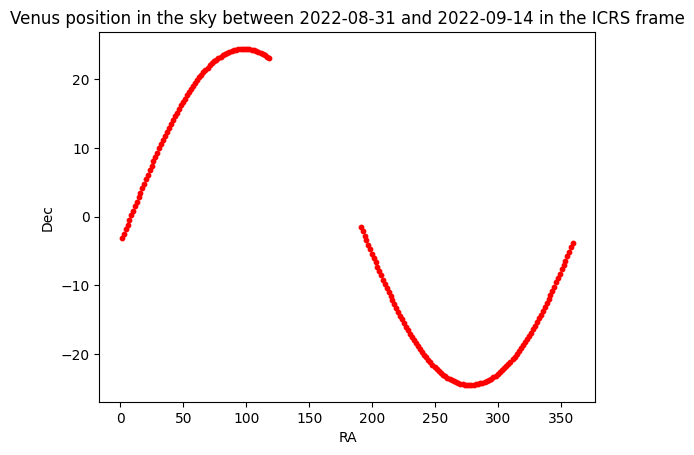

In [26]:
from skyfield.api import load
from skyfield import units
from astropy.time import Time
from astropy import units as u
from datetime import timedelta
from astropy.coordinates import SkyCoord

# Create a timescale and initialise beginning and end time.
ts = load.timescale()
t = ts.utc(2022, 3, range(1,180,1))

# Load the JPL ephemeris DE421 (covers 1900-2050).
eph = load('de421.bsp')
sun, earth, venus = eph['sun'], eph['earth'], eph['venus']

# Compute the position of Venus in the BCRS frame.
venus_positions = []
venus_times = []
plt.figure()
for t in t:
    print(t.utc_iso())
    venus_pos = venus.at(t)
    ra, dec, distance = venus_pos.radec() 
    dec = dec.to(u.deg)
    ra = ra.to(u.deg)
    venus_times.append(t)
    c = SkyCoord(ra, dec, frame='icrs')
    venus_positions.append(c)
    plt.scatter(c.ra, c.dec,s=10, c='r', marker='o')   
plt.xlabel('RA')
plt.ylabel('Dec')
plt.title('Venus position in the sky between 2022-08-31 and 2022-09-14 in the ICRS frame')


Ok now let's try to superimpose this to the scws. We will define a radius of 15° and a query for each day around each position maybe ?
It's RA that changes quite a lot per day(~7°) and not Dec. So let's define a radius of 15° around each point and query for it. That should cover everything approximately.

In [27]:
import astroquery.heasarc
from astroquery.heasarc import Heasarc, Conf
from astropy.io import fits
from scipy import stats

Heasarc = astroquery.heasarc.Heasarc()
Conf.server.set('https://www.isdc.unige.ch/browse/w3query.pl')
table = Heasarc.query_mission_list()
table.pprint(max_width=120)

def get_scw_list(coord,radius,start_date,end_date ):
    R = Heasarc.query_region(
            coord,
            mission = 'integral_rev3_scw',
            radius=radius,
            time = start_date + ' .. ' + end_date,
            good_jemx = ">1000",
        )


    return R
def save_scw_list(R,save_path):
    R.write(save_path,format ='ascii.csv' ,overwrite=True)

assert astroquery.__version__ >= '0.4.2.dev6611'

# it means it's our fork
assert 'isdc' in astroquery.heasarc.Conf.server.cfgtype

radius = '15 degree'
for coord,time in zip(venus_positions,venus_times):
    delta_time = time + 1
    time = time.utc_strftime('%Y-%m-%dT%H:%M:%S')
    delta_time = delta_time.utc_strftime('%Y-%m-%dT%H:%M:%S')
    table = get_scw_list(coord,radius,time,delta_time)
    save_scw_list(table, str(time.replace(':','_') + '.csv'))

   Mission            Table                         Table Description               
------------- ---------------------- -----------------------------------------------
CTASST1M-REV1     cta_sst1m_rev1_run                                             Run
    FACT-REV1          fact_rev1_run                                             Run
INTEGRAL-REV3     integral_rev3_prop                                       Proposals
INTEGRAL-REV3 integral_rev3_prop_obs Proposal Information and Observation Parameters
INTEGRAL-REV3      integral_rev3_scw                       SCW - Science Window Data


In [28]:
print(table.info)
#print(table.colnames)
print(table)

<Table length=0>
<No columns>

<No columns>


In [81]:
for coord, time in zip(venus_positions, venus_times):
    print(coord, time.utc_strftime('%Y-%m-%dT%H:%M:%S'))

<SkyCoord (ICRS): (ra, dec) in deg
    (238.17524823, -19.26586264)> 2022-04-01T00:00:00
<SkyCoord (ICRS): (ra, dec) in deg
    (244.7396939, -20.83256117)> 2022-04-05T00:00:00
<SkyCoord (ICRS): (ra, dec) in deg
    (251.43010488, -22.14479671)> 2022-04-09T00:00:00
<SkyCoord (ICRS): (ra, dec) in deg
    (258.23289814, -23.18011345)> 2022-04-13T00:00:00
<SkyCoord (ICRS): (ra, dec) in deg
    (265.12710544, -23.91971733)> 2022-04-17T00:00:00
<SkyCoord (ICRS): (ra, dec) in deg
    (272.08530728, -24.34948398)> 2022-04-21T00:00:00
<SkyCoord (ICRS): (ra, dec) in deg
    (279.07534775, -24.46080713)> 2022-04-25T00:00:00
<SkyCoord (ICRS): (ra, dec) in deg
    (286.06269, -24.25115609)> 2022-04-29T00:00:00
<SkyCoord (ICRS): (ra, dec) in deg
    (293.01311542, -23.72424871)> 2022-05-03T00:00:00
<SkyCoord (ICRS): (ra, dec) in deg
    (299.89537824, -22.88981036)> 2022-05-07T00:00:00
<SkyCoord (ICRS): (ra, dec) in deg
    (306.68343952, -21.7629625)> 2022-05-11T00:00:00
<SkyCoord (ICRS): (ra, dec

Let's try to use the image from 25.04.22, the first scw.

In [90]:
#Get some login

import getpass
token = getpass.getpass('insert your token: ')
import oda_api.token
oda_api.token.decode_oda_token(token)


{'sub': 'kent.barbey@epfl.ch',
 'email': 'kent.barbey@epfl.ch',
 'name': 'kbarbey',
 'roles': 'authenticated user',
 'exp': 1680956762}

In [91]:
import logging
#default
#logging.getLogger().setLevel(logging.WARNING)
#slightly more verbose
logging.getLogger().setLevel(logging.INFO)
#all messages
#logging.getLogger().setLevel(logging.DEBUG)

logging.getLogger('oda_api').addHandler(logging.StreamHandler())

In [93]:
scw_pick_test = 249500350010

from oda_api.api import DispatcherAPI

disp = DispatcherAPI(url="https://www.astro.unige.ch/mmoda/dispatch-data", instrument="mock")

par_dict = {
"E1_keV": "28",
"E2_keV": "100",
"detection_threshold": "7",
"instrument": "isgri",
"osa_version": "OSA11.2",
"product": "isgri_image",
"product_type": "Real",
"scw_list": scw_pick_test,
"integral_data_rights": "all-private",
"token": token
}

data_collection = disp.get_product(**par_dict)

please beware that by default, in a typical setup, oda_api will not output much. To learn how to increase the verbosity, please refer to the documentation: https://oda-api.readthedocs.io/en/latest/user_guide/ScienceWindowList.html?highlight=logging#Let's-get-some-logging . 
To disable this message you can pass `.get_product(..., silent=True)`
- waiting for remote response (since 2023-04-04 14:37:59), please wait for https://www.astro.unige.ch/mmoda/dispatch-data/run_analysis
something went quite wrong, and we think it's not likely to recover on its own: Unauthorized (line 90): Unfortunately, your priviledges are not sufficient to make the request for this particular product and parameter combination.
- Your priviledge roles include ['authenticated user']
- You are lacking all of the following roles:
 - integral-private-qla: this role is needed to access private INTEGRAL data requested with integral_data_rights == "all-private"
You can request support if you think you should be able to 

Unauthorized: Unauthorized (line 90): Unfortunately, your priviledges are not sufficient to make the request for this particular product and parameter combination.
- Your priviledge roles include ['authenticated user']
- You are lacking all of the following roles:
 - integral-private-qla: this role is needed to access private INTEGRAL data requested with integral_data_rights == "all-private"
You can request support if you think you should be able to make this request.